## 1-1. 인공지능과 가위바위보 하기

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))  # x_train 배열의 크기를 출력|


2.15.0
60000


## 1-2. 데이터를 준비하자

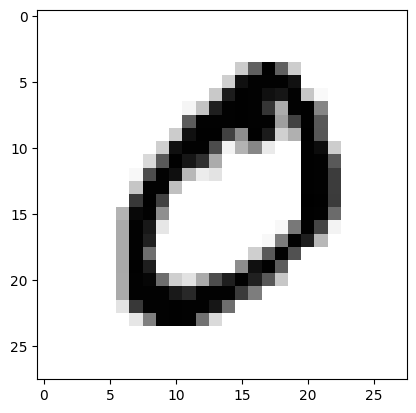

In [2]:
plt.imshow(x_train[1], cmap = plt.cm.binary)
plt.show()

In [3]:
print(y_train[1])

0


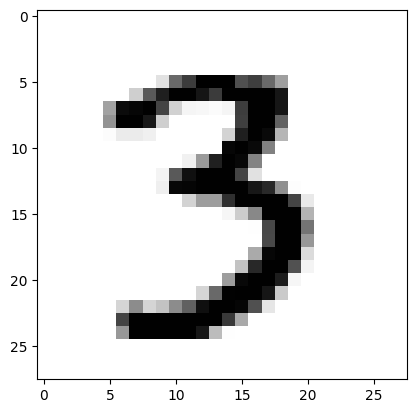

10001 번째 이미지의 숫자는 바로  3 입니다.


In [4]:
index = 10000
plt.imshow(x_train[index], cmap=plt.cm.binary)
plt.show()

print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


In [7]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


## 1-3. 딥러닝 네트워크 설계하기

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(32, (3, 3)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 32)                2

## 1-4. 딥러닝 네트워크 학습시키기

In [10]:
print(f"Before Reshape - x_train_norm shape: {x_train_norm.shape}")
print(f"Before Reshape - x_test_norm shape: {x_test_norm.shape}")

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print(f"After Reshape - x_train_reshaped shape: {x_train_reshaped.shape}")
print(f"After Reshape - x_test_reshaped shape: {x_test_reshaped.shape}")

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [11]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10


1875/1875 [==============================] - 4s 2ms/step - loss: 0.1960 - accuracy: 0.9405
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0653 - accuracy: 0.9803
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0475 - accuracy: 0.9852
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0380 - accuracy: 0.9885
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0304 - accuracy: 0.9902
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0257 - accuracy: 0.9919
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0212 - accuracy: 0.9930
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0180 - accuracy: 0.9945
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0143 - accuracy: 0.9952
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0

## 1-5. 얼마나 잘 만들었는지 확인하기

In [12]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

313/313 - 0s - loss: 0.0551 - accuracy: 0.9866 - 347ms/epoch - 1ms/step
test_loss: 0.05514935776591301
test_accuracy: 0.9865999817848206


In [13]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

313/313 [==============================] - 0s 796us/step
model.predict() 결과 :  [9.5870556e-09 1.2512461e-09 2.8966888e-08 1.3900122e-06 4.1778660e-11
 1.6021606e-09 3.7051805e-17 9.9999845e-01 3.5293652e-08 5.4013918e-09]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


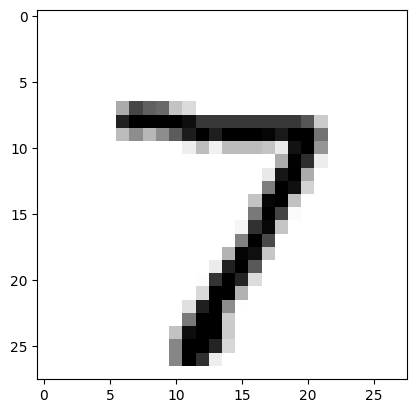

In [14]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [3.4272979e-10 2.0966201e-10 4.4192861e-13 9.6110675e-10 7.1459426e-16
 8.6415452e-01 1.3580927e-01 2.1878770e-09 3.5719913e-05 5.1034050e-07]
라벨: 6, 예측결과: 5


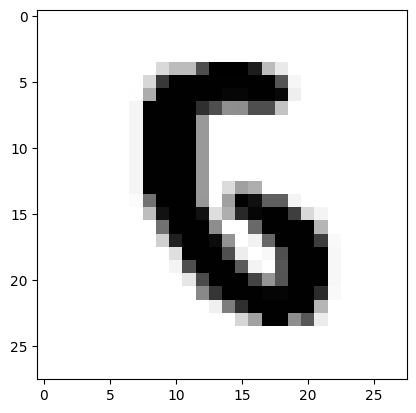

예측확률분포: [2.41975263e-01 1.44859085e-08 8.47207091e-04 2.74355739e-06
 5.04639356e-05 7.33362854e-01 2.02514026e-02 2.71652220e-06
 3.50424298e-03 3.10634755e-06]
라벨: 8, 예측결과: 5


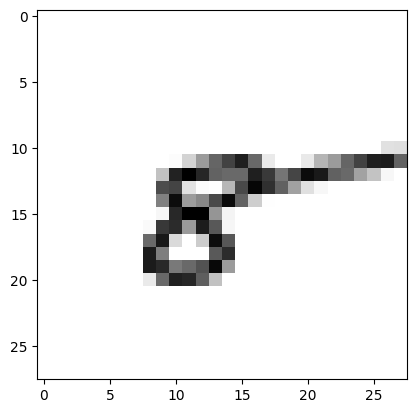

예측확률분포: [1.0612746e-10 1.3557704e-07 2.4277145e-11 2.9397383e-01 2.6138253e-10
 7.0365810e-01 3.5773225e-12 1.6086895e-09 4.9418723e-08 2.3678814e-03]
라벨: 3, 예측결과: 5


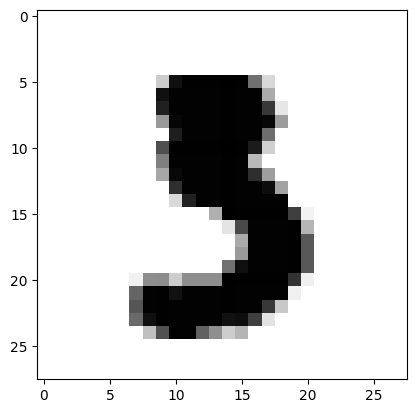

예측확률분포: [9.9384224e-01 4.2100701e-09 1.0641120e-15 1.3942039e-09 6.1301114e-07
 5.6423893e-04 5.5929092e-03 9.4923992e-11 8.5378225e-11 1.7152082e-08]
라벨: 6, 예측결과: 0


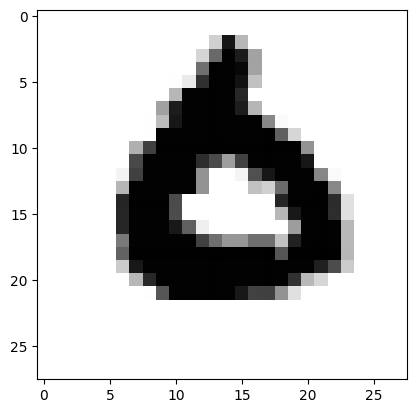

예측확률분포: [1.3152812e-05 2.1980913e-02 1.6092794e-04 3.6345859e-04 8.4338142e-03
 1.2144529e-05 2.2136939e-08 9.1081470e-01 6.3038315e-04 5.7590488e-02]
라벨: 9, 예측결과: 7


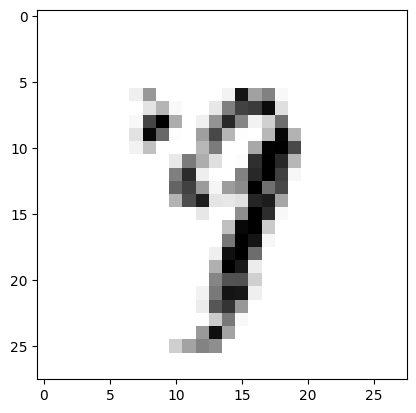

In [15]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## 1-6. 더 좋은 네트워크 만들어보기

In [16]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32
n_channel_2=64
n_dense=128
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam


def improved_model(n_channel_1, n_channel_2, n_dense):
    model = Sequential()
    
    # 첫 번째 합성곱층
    model.add(Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization())  # 배치 정규화 추가
    
    # 두 번째 합성곱층
    model.add(Conv2D(n_channel_2, (3,3), activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(BatchNormalization())  # 배치 정규화 추가
    
    # 세 번째 합성곱층
    model.add(Conv2D(n_channel_2, (3,3), activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(BatchNormalization())  # 배치 정규화 추가

    model.add(Flatten())
    
    # 첫 번째 완전 연결층
    model.add(Dense(n_dense, activation='relu'))
    model.add(Dropout(0.5))  # 드롭아웃 추가
    
    # 두 번째 완전 연결층
    model.add(Dense(n_dense, activation='relu'))
    model.add(Dropout(0.5))  # 드롭아웃 추가
    
    # 출력층
    model.add(Dense(10, activation='softmax'))
    
    return model

# 모델 생성
n_channel_1 = 64
n_channel_2 = 128
n_dense = 128

improved_model = improved_model(n_channel_1, n_channel_2, n_dense)

# 모델 컴파일
improved_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 요약 출력
improved_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 13, 13, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                      

In [18]:
# 모델 훈련
improved_model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = improved_model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 0.2756 - accuracy: 0.9194
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1111 - accuracy: 0.9708
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0849 - accuracy: 0.9774
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0728 - accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0630 - accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0536 - accuracy: 0.9857
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0499 - accuracy: 0.9870
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0433 - accuracy: 0.9883
Epoch 9/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0432 - accuracy: 0.9883
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/ste